In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [16]:
data = pd.read_csv('data/kc_house_data.csv')

# Remove any rows with NaN values
data = data.dropna()

# Remove the target variable, axis=1 indicates column
training_data = data.drop('price', axis=1)

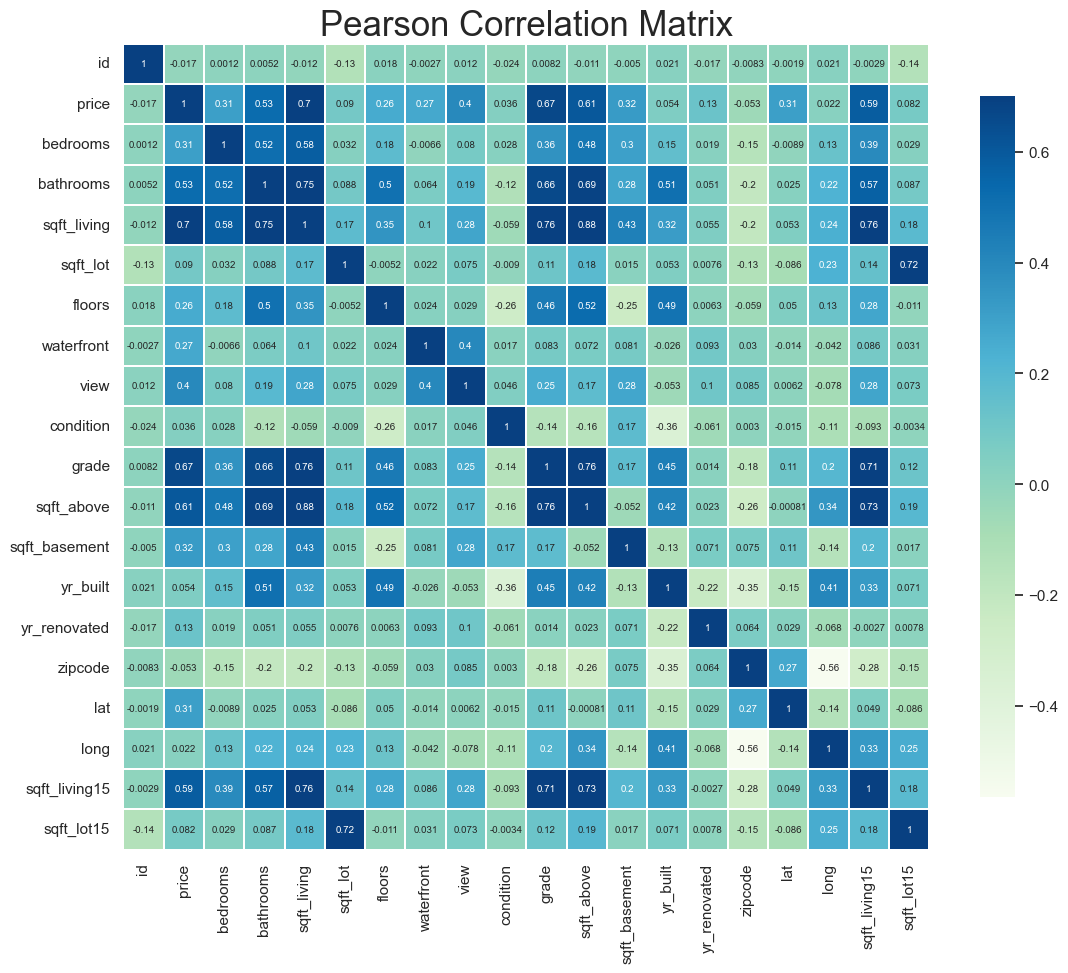

price            1.000000
sqft_living      0.702055
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585377
bathrooms        0.525150
view             0.397299
sqft_basement    0.323842
bedrooms         0.308366
lat              0.307010
waterfront       0.266371
floors           0.256814
yr_renovated     0.126436
sqft_lot         0.089661
sqft_lot15       0.082448
yr_built         0.054006
condition        0.036379
long             0.021613
id              -0.016742
zipcode         -0.053182
Name: price, dtype: float64


In [17]:
#Lets see which features are most relevant

sns.set_theme(style="whitegrid", font_scale=1)

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Now compute correlation and plot
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(numeric_data.corr(), linewidths=0.25, vmax=0.7, square=True,
            cmap="GnBu", linecolor='w', annot=True, annot_kws={"size":7},
            cbar_kws={"shrink": .7})

plt.show()

price_cor = numeric_data.corr()['price'].sort_values(ascending=False)
print(price_cor)

In [18]:
#We see that zip code and id are negatively correlated with price, so we will drop them
# We also drop date that is not numerical
training_data = training_data.drop(['id', 'zipcode', 'date'], axis=1)

In [23]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(training_data.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21611, dtype: float64
Epoch 1/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 262792593408.0000 - mae: 371778.1562 - val_loss: 83474128896.0000 - val_mae: 182068.9062
Epoch 2/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 81156653056.0000 - mae: 181176.3906 - val_loss: 76162072576.0000 - val_mae: 175153.4219
Epoch 3/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 74687045632.0000 - mae: 172953.3594 - val_loss: 74567925760.0000 - val_mae: 187152.3750
Epoch 4/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 64707477504.0000 - mae: 169502.6250 - val_loss: 71333601280.0000 - val_mae: 177254.7656
Epoch 5/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 69435277312.0000 - mae: 172732.2188 - val_loss: 71086686208.0000 - val_mae: 182160.6562
Epoch 6

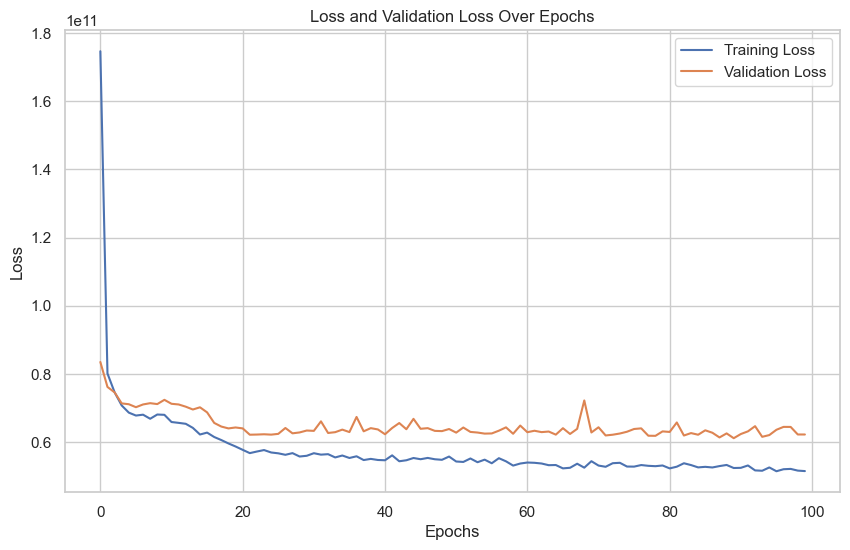

In [20]:
# Plot the loss and validation loss
print(data['price'])
history = model.fit(
    training_data, data['price'],
    epochs=100, 
    batch_size=32, 
    validation_split=0.2)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model.save('models/house_price_model.h5')  # Save to file